In [1]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import seaborn

%matplotlib inline

In [2]:
N = 100

In [3]:
x = np.linspace(0, np.pi, N)
y = np.linspace(0, np.pi, N)
z = np.linspace(0, np.pi, N)

X, Y, Z = np.meshgrid(x, y, z)

In [4]:
# case R^3

with open('../data.bin') as f_data:
    S = []
    for i, s in enumerate(f_data):
        if i % 20:
            continue
        s = list(map(float, s.strip().split()))
        s = np.asarray(s).reshape(len(x), len(y), len(z))
        S.append(s)
S[0].shape

(100, 100, 100)

In [5]:
S = np.asarray(S)
S.shape

(150, 100, 100, 100)

In [6]:
X.shape, Y.shape, S[0].shape

((100, 100, 100), (100, 100, 100), (100, 100, 100))

In [7]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

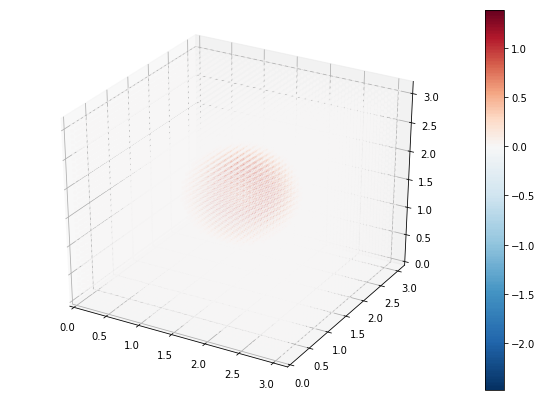

In [10]:
s = tuple(slice(1, None, 3) for i in range(3))

cmap_norm = MidpointNormalize(vmin=S.min(), vmax=S.max(), midpoint=0)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter(X[s], Y[s], Z[s], c=S[0][s].ravel(), s=5, norm=cmap_norm, cmap='RdBu_r')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(z.min(), z.max())
plt.colorbar(plot, ax=ax)
plt.show()

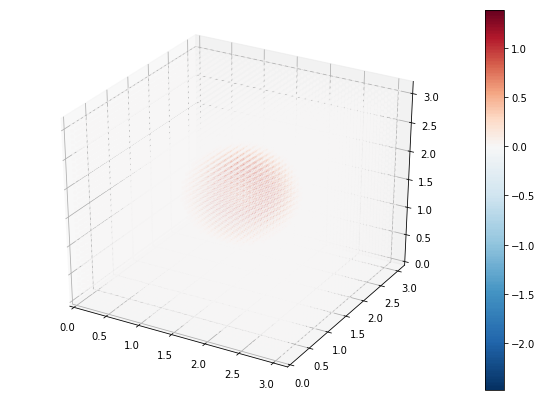

In [11]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter(X[s], Y[s], Z[s], c=S[0][s].ravel(), s=5, norm=cmap_norm, cmap='RdBu_r')
plt.colorbar(plot, ax=ax)

plot = None

def animate(i):
    ax.clear()
    plot = ax.scatter(X[s], Y[s], Z[s], c=S[i][s].ravel(), s=5, norm=cmap_norm, cmap='RdBu_r')
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())
    return plot,

anim = FuncAnimation(fig, animate, frames=np.arange(0, len(S)), interval=1, blit=False)
anim.save('plot_4d.gif', dpi=100, writer='imagemagick')